# Задание 7
## Аналитическое решение
Нужно найти общее и частное решение диффура $-u'' + u = x$

Общее решение $-u'' + u = 0$ это $c_1 e^{x} + c_2 e ^{-x}$, так как корни уравнения $-\lambda^2 + 1 = 0$ это $1$ и $-1$ 

Частное решение очевидно $x$

Тогда решение системы это $c_1 e^x + c_2 e^{-x} + x$, при этом оно должно удовлетворять условиям $u(0) = u(1) = 0$

Решая систему

$с_1 + с_2 = 0$

$с_1 e + \frac{c_2}{e} + 1 = 0$

получаем что $c_1 = \frac{e}{1-e^2}$, $c_2 = \frac{e}{e^2 - 1}$

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def u_analytical(x):
    return np.exp(1) / (1 - np.exp(2)) * (np.exp(x) - np.exp(-x)) + x

In [80]:
def A(N):
    h = 1 / (N + 1)
    a = np.zeros((N,N))
    i,j = np.indices(a.shape)
    a[i == j] = 2 * h ** (-2) + 1
    a[i == j - 1] = -h ** (-2)
    a[i == j + 1] = -h ** (-2)
    return a

In [81]:
def get_b(N):
    h = 1 / (N + 1)
    return np.array([i * h for i in range(1, N + 1)])

In [82]:
def solve_system(N):
    return np.linalg.solve(A(N), get_b(N))

def u_vector(N):
    h = 1 / (N + 1)
    return np.array([u_analytical(i * h) for i in range(1, N + 1)])

## 7.1

In [83]:
def plot_difference():
    N = 1000
    n = range(1, N + 1)
    error = [np.log10(max(abs(solve_system(i) - u_vector(i)))) for i in n] 
    plt.plot([np.log10(i) for i in n], error)
    plt.xlabel('log(N)')
    plt.ylabel('log(error)')
    plt.title('Difference')
    plt.show()  

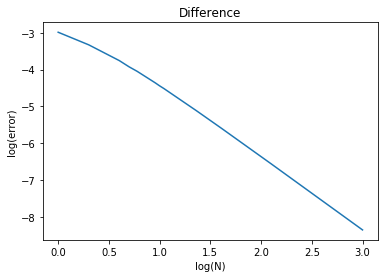

In [84]:
plot_difference()

Как видим, ошибка убывает степенным образом от количества точек. 

In [144]:
def count_time(N):
    a = A(N)
    b = get_b(N)
    start_time = time.time()
    np.linalg.solve(a, b)
    return time.time() - start_time

In [149]:
import time

def plot_time():
    N = 1100
    n = range(1, N + 1)
    error = [np.log10(count_time(i)) for i in n] 
    plt.plot([np.log10(i) for i in n], error)
    plt.xlabel('log(N)')
    plt.ylabel('log(seconds)')
    plt.title('time')
    plt.show()  

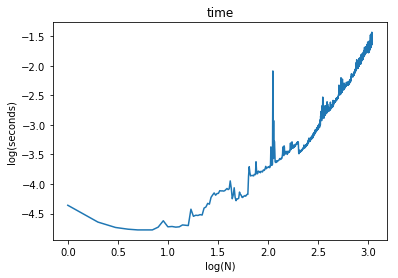

In [150]:
plot_time()

Как видим, зависимость более менее линейная, начиная с $\log(N) = 2.5$ (видимо, в начале используются какие-то оптимизации) $\Rightarrow$ зависимость времени от количества точек степенная и похожа на куб. 

## 7.2

Достаточное условие выполняется, так как диагональный элемент на 1 больше чем сумма элементов на субдиагоналях.

In [136]:
def tridiagonal_system_solver(a, b, c, s):
    alphas = [b[0] / c[0]]
    betas = [s[0] / c[0]]
    for i in range(1, len(a)):
        alphas.append(b[i] / (c[i] - alphas[i - 1] * a[i]))
        betas.append((s[i] + betas[i - 1] * a[i]) / (c[i] - alphas[i - 1] * a[i]))
    t = [betas[-1]]
    for i in reversed(range(1, len(a))):
        t.append(alphas[i] * t[-1] + betas[i])
    return np.array(list(reversed(t)))

def solve_system_tridiagonal(N):
    h = 1 / (N + 1)
    s = get_b(N)
    a = [h ** (-2) for _ in range(N)]
    b = [h ** (-2) for _ in range(N)]
    c = [2 * h ** (-2) + 1 for _ in range(N)]
    return tridiagonal_system_solver(a, b, c, s)

In [137]:
def plot_difference():
    N = 1000
    n = range(1, N + 1)
    error_tridiagonal = [np.log10(max(abs(solve_system_tridiagonal(i) - u_vector(i)))) for i in n] 
    error_linalg = [np.log10(max(abs(solve_system(i) - u_vector(i)))) for i in n] 
    plt.plot([np.log10(i) for i in n], error_linalg, label="np.linalg")
    plt.plot([np.log10(i) for i in n], error_tridiagonal, label="tridiagonal")
    plt.xlabel('log(N)')
    plt.ylabel('log(error)')
    plt.title('Difference')
    plt.legend()
    plt.show()

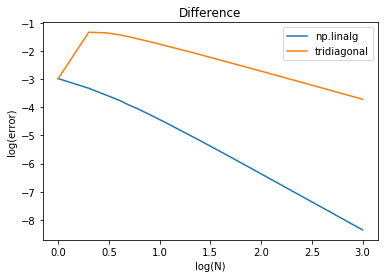

In [138]:
plot_difference()

Сходимость у прогонки тоже степенная, но степень гораздо ниже.

In [122]:
def count_time(N):
    start_time = time.time()
    solve_system_tridiagonal(N)
    return time.time() - start_time

In [125]:
def plot_time():
    N = 3000
    n = range(1, N + 1)
    error = [np.log10(count_time(i)) for i in n] 
    plt.plot([np.log10(i) for i in n], error)
    plt.xlabel('N')
    plt.ylabel('log(log(seconds))')
    plt.title('time')
    plt.show()  

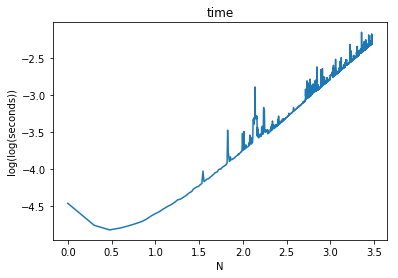

In [126]:
plot_time()

Время линейное.

In [139]:
def count_time_linalg(N):
    a = A(N)
    b = get_b(N)
    start_time = time.time()
    np.linalg.solve(a, b)
    return time.time() - start_time

In [141]:
def plot_time_compare():
    N = 1000
    n = range(1, N + 1)
    time_tri = [np.log10(count_time(i)) for i in n] 
    time_lin = [np.log10(count_time_linalg(i)) for i in n] 
    plt.plot([np.log10(i) for i in n], time_tri, label="tridiagonal")
    plt.plot([np.log10(i) for i in n], time_lin, label="np.linalg")
    plt.xlabel('log(N)')
    plt.ylabel('log(seconds)')
    plt.title('time')
    plt.legend()
    plt.show()

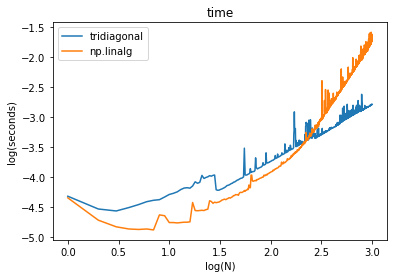

In [142]:
plot_time_compare()

Опять же, видим что начиная с $\log(N) = 2.5$ linalg растёт сильно быстрее (скорее всего из-за отключения оптимизаций), метод прогонки работает за линию, как и ожидалось.

## 7.2

In [169]:
def L(N):
    h = 1 / (N + 1)
    a = np.zeros((N,N))
    i,j = np.indices(a.shape)
    a[i == j - 1] = -h ** (-2)
    return a


def D(N):
    h = 1 / (N + 1)
    a = np.zeros((N,N))
    i,j = np.indices(a.shape)
    a[i == j] = 2 * h ** (-2) + 1
    return a


def U(N):
    h = 1 / (N + 1)
    a = np.zeros((N,N))
    i,j = np.indices(a.shape)
    a[i == j + 1] = -h ** (-2)
    return a


def T(omega, N):
    return np.linalg.inv(D(N) + omega * L(N)) @ ((1 - omega) * D(N) - omega * U(N))


def SOR(k, N, omega):
    x = np.zeros(N)
    addition = omega * np.linalg.inv(D(N) + omega * L(N)) @ get_b(N)
    t = T(omega, N)
    ans = []
    for i in range(k):
        x = t @ x + addition
        ans.append(x)
    return ans

In [186]:
def plot_difference(N):
    omega = [1, 1.3, 1.6, 1.8, 1.9]
    linalg = solve_system(N)
    k = 1000
    for o in omega:
        ans = SOR(k, N, o)
        plt.plot(range(k), [np.log10(max(abs(linalg - ans[i]))) for i in range(k)] , label="omega=" + str(o))
    plt.xlabel('k')
    plt.ylabel('log(difference)')
    plt.title('N=' + str(N))
    plt.legend() 
    plt.show()

In [209]:
def plot():
    n = [2, 5, 10, 30, 100, 300, 1000, 2000]
    for i in n:
        plot_difference(i)

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


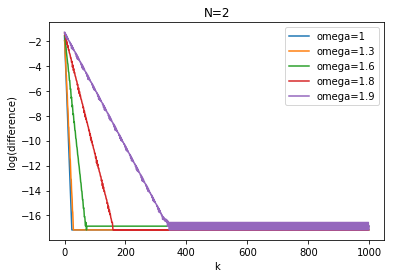

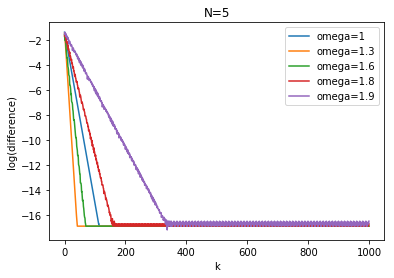

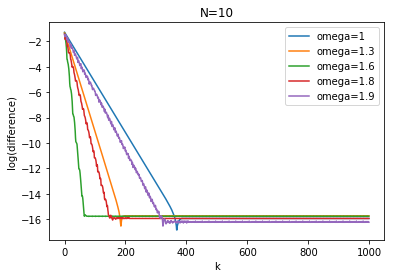

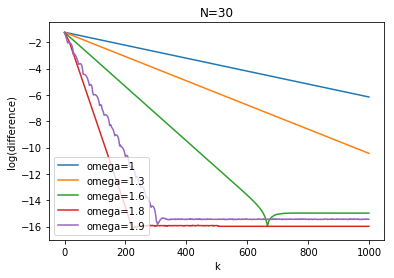

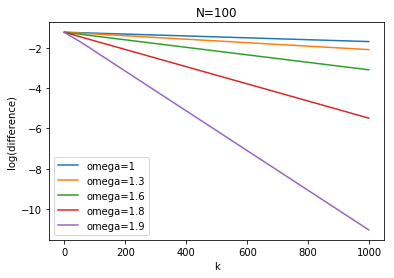

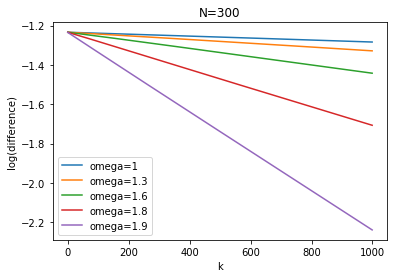

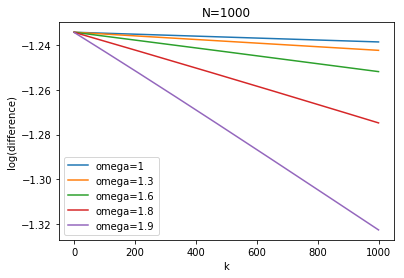

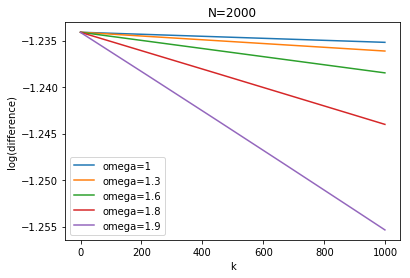

In [210]:
plot()

Как видим, скорость сходимости экспоненциальная, что согласуется с лекцией. При этом оптимальная $\omega$ может быть любой в зависимости от N, причём при росте N $\omega$ так же растёт.Также видно, что при росте N растёт и отклонение от значения, полученного методом прогонки.